# Market Basket Analysis

- analysis of baskets all together
- powerful tool for implementation of up-selling, cross-selling and inventory management strategies
- useful in stock management and placement of items
- 
### Association Rule Mining?

#### Lift? 
    - provides information on whether an association exists
    
#### Support?
    - fraction of transactions in dataset that containts that item
#### Confidence?
    - conditional probability that shows the transaction containing LHS will have RHS?

In [153]:
import warnings

# Suppress DeprecationWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
grocery_df = pd.read_csv('Groceries data.csv')
basket_df = pd.read_csv("basket.csv")

In [3]:
print(grocery_df.head()) 
grocery_df.describe()

   Member_number        Date   itemDescription  year  month  day  day_of_week
0           1808  2015-07-21    tropical fruit  2015      7   21            1
1           2552  2015-05-01        whole milk  2015      5    1            4
2           2300  2015-09-19         pip fruit  2015      9   19            5
3           1187  2015-12-12  other vegetables  2015     12   12            5
4           3037  2015-01-02        whole milk  2015      1    2            4


,Member_number,year,month,day,day_of_week
count,38765.000000,38765.000000,38765.000000,38765.000000,38765.000000
mean,3003.641868,2014.528518,6.477570,15.753231,3.014498
std,1153.611031,0.499193,3.431561,8.801391,1.987669
min,1000.000000,2014.000000,1.000000,1.000000,0.000000
25%,2002.000000,2014.000000,4.000000,8.000000,1.000000
50%,3005.000000,2015.000000,6.000000,16.000000,3.000000
75%,4007.000000,2015.000000,9.000000,23.000000,5.000000
max,5000.000000,2015.000000,12.000000,31.000000,6.000000


In [4]:
print(basket_df.head())
basket_df.describe()

             0                   1                    2       3    4    5  \
0   whole milk              pastry          salty snack     NaN  NaN  NaN   
1      sausage          whole milk  semi-finished bread  yogurt  NaN  NaN   
2         soda  pickled vegetables                  NaN     NaN  NaN  NaN   
3  canned beer     misc. beverages                  NaN     NaN  NaN  NaN   
4      sausage    hygiene articles                  NaN     NaN  NaN  NaN   

     6    7    8    9   10  
0  NaN  NaN  NaN  NaN  NaN  
1  NaN  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  NaN  NaN  
3  NaN  NaN  NaN  NaN  NaN  
4  NaN  NaN  NaN  NaN  NaN  


,0,1,2,3,4,5,6,7,8,9,10
count,14963,14963,4883,2185,795,451,276,196,51,1,1
unique,165,165,154,146,126,101,88,72,35,1,1
top,whole milk,whole milk,whole milk,whole milk,whole milk,shopping bags,yogurt,whole milk,shopping bags,curd,newspapers
freq,1083,983,244,111,39,25,19,14,4,1,1


In [5]:
print(grocery_df.dtypes) 
basket_df.dtypes

Member_number       int64
Date               object
itemDescription    object
year                int64
month               int64
day                 int64
day_of_week         int64
dtype: object


0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
dtype: object

In [6]:
freq_sold = grocery_df['itemDescription'].value_counts()
#Series object, taking the top 25 items based on the value counts
freq_sold = freq_sold.nlargest(25)
freq_sold['sausage']

924

<AxesSubplot:>

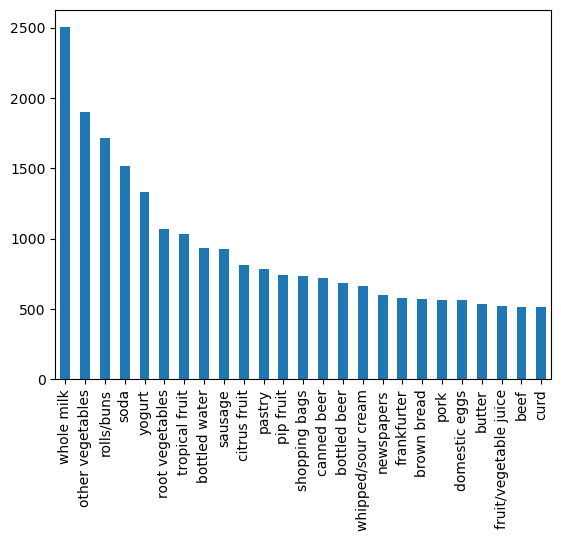

In [7]:
freq_sold.plot(kind='bar', rot=90)

In [8]:
#getting the df of one particular user in a particular date
specific_data = grocery_df[(grocery_df['Member_number'] == 2300) & (grocery_df['Date']=='2015-09-19')]
specific_data

,Member_number,Date,itemDescription,year,month,day,day_of_week
2,2300,2015-09-19,pip fruit,2015,9,19,5
16151,2300,2015-09-19,other vegetables,2015,9,19,5
36090,2300,2015-09-19,flour,2015,9,19,5


In [9]:
all_members = grocery_df['Member_number'].values
all_members.shape

(38765,)

In [10]:
all_dates = grocery_df['Date'].values
all_dates.shape

(38765,)

In [192]:
grouped_grocery_df = grocery_df.groupby(['Member_number', 'Date'])
grouped_grocery_df.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4
...,...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,10,6
38761,2022,2014-02-23,candy,2014,2,23,6
38762,1097,2014-04-16,cake bar,2014,4,16,2
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12,2


In [195]:
transactions = [list(grocery_df[(grocery_df['Member_number'] == i[0]) & (grocery_df['Date'] == i[1])].itemDescription) for i in zip(all_members,all_dates)]

In [196]:
len(transactions)

38765

In [197]:
transactions[:5]

[['tropical fruit', 'rolls/buns', 'candy'],
 ['whole milk', 'tropical fruit', 'chocolate'],
 ['pip fruit', 'other vegetables', 'flour'],
 ['other vegetables', 'onions', 'shopping bags'],
 ['whole milk', 'other vegetables', 'white bread']]

In [193]:
for (member, date), group_data in grouped_grocery_df:
    print(member, date)
    print(group_data)
    break

1000 2014-06-24
       Member_number        Date itemDescription  year  month  day  \
13331           1000  2014-06-24      whole milk  2014      6   24   
29480           1000  2014-06-24          pastry  2014      6   24   
32851           1000  2014-06-24     salty snack  2014      6   24   

       day_of_week  
13331            1  
29480            1  
32851            1  


In [194]:
len(grouped_grocery_df)

14963

In [198]:
# Initialize an empty list to store item descriptions for each member-date combination
transformed_data = []

# Iterate through the zip of all_members and all_dates
for i in zip(all_members, all_dates):
    # Filter grocery_df based on Member Number and Date
    filtered_df = grocery_df[(grocery_df['Member_number'] == i[0]) & (grocery_df['Date'] == i[1])]
    
    # Extract itemDescription from filtered DataFrame and convert it to a list
    item_descriptions = list(filtered_df['itemDescription'])
    
    # Append the list of item descriptions to the transactions list
    transformed_data.append(item_descriptions)

In [199]:
len(transformed_data)

38765

In [200]:
transformed_data[:3]

[['tropical fruit', 'rolls/buns', 'candy'],
 ['whole milk', 'tropical fruit', 'chocolate'],
 ['pip fruit', 'other vegetables', 'flour']]

In [201]:
from itertools import permutations

In [202]:
a = np.random.randn(1,4)

In [203]:
# ab = list(permutations([t for data in transformed_data for t in data], 2))


In [204]:
flat_list = [i for row in transformed_data for i in row]
len(flat_list)

119113

In [205]:
flat_set = list(set(flat_list))
len(flat_set)

167

In [206]:
#167P2 = 27722
rules_ = list(permutations(flat_set, 2))
len(rules_)

27722

In [207]:
rules_[:5]

[('dishes', 'frozen chicken'),
 ('dishes', 'pasta'),
 ('dishes', 'napkins'),
 ('dishes', 'canned fish'),
 ('dishes', 'sparkling wine')]

In [208]:
print(transformed_data[0])
#seeing which combo occurs the most among the 167 separate items
temp_list = []
for i in transformed_data:
    temp_list.append(tuple(i))

['tropical fruit', 'rolls/buns', 'candy']


In [209]:
from collections import Counter

In [210]:
Counter(temp_list).most_common(6)

[(('other vegetables', 'whole milk'), 96),
 (('whole milk', 'whole milk'), 80),
 (('whole milk', 'rolls/buns'), 76),
 (('sausage', 'whole milk'), 74),
 (('whole milk', 'other vegetables'), 74),
 (('citrus fruit', 'whole milk'), 64)]

In [211]:
#computing antecedent support, consequent support, support, confidence, lift
print(temp_list[:5])

[('tropical fruit', 'rolls/buns', 'candy'), ('whole milk', 'tropical fruit', 'chocolate'), ('pip fruit', 'other vegetables', 'flour'), ('other vegetables', 'onions', 'shopping bags'), ('whole milk', 'other vegetables', 'white bread')]


In [212]:
import mlxtend

In [213]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth, association_rules

te = TransactionEncoder()
te_ary = te.fit(transformed_data).transform(transformed_data)
df = pd.DataFrame(te_ary, columns=te.columns_)

# frequent_itemsets = fpgrowth(df, min_support=0.01, use_colnames=True)
### alternatively:
frequent_itemsets = apriori(df, min_support=0.01, max_len=2,use_colnames=True)
#frequent_itemsets = fpmax(df, min_support=0.6, use_colnames=True)

print(frequent_itemsets)

     support                      itemsets
0   0.024532                    (UHT-milk)
1   0.039623                        (beef)
2   0.024739                     (berries)
3   0.019347                   (beverages)
4   0.054740                (bottled beer)
..       ...                           ...
84  0.015246         (whole milk, sausage)
85  0.010215             (yogurt, sausage)
86  0.018522            (whole milk, soda)
87  0.012924  (whole milk, tropical fruit)
88  0.018677          (yogurt, whole milk)

[89 rows x 2 columns]


In [214]:
len(df)

38765

In [215]:
df['UHT-milk'].mean()

0.02453243905584935

In [216]:
rules = association_rules(frequent_itemsets,metric = "support",min_threshold = 0.0)
print(rules.head())

       antecedents      consequents  antecedent support  consequent support  \
0     (whole milk)   (bottled beer)            0.183748            0.054740   
1   (bottled beer)     (whole milk)            0.054740            0.183748   
2     (whole milk)  (bottled water)            0.183748            0.069496   
3  (bottled water)     (whole milk)            0.069496            0.183748   
4   (citrus fruit)     (whole milk)            0.060647            0.183748   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.010602    0.057700  1.054079  0.000544    1.003142       0.062854  
1  0.010602    0.193685  1.054079  0.000544    1.012324       0.054276  
2  0.010473    0.056998  0.820173 -0.002296    0.986747      -0.211737  
3  0.010473    0.150705  0.820173 -0.002296    0.961094      -0.190697  
4  0.011247    0.185453  1.009278  0.000103    1.002093       0.009786  


# computing them without the use of Library

In [217]:
rules_[1231:1235], rules_[2312:2320], len(rules_)

([('syrup', 'curd cheese'),
  ('syrup', 'cookware'),
  ('syrup', 'salty snack'),
  ('syrup', 'herbs')],
 [('soap', 'semi-finished bread'),
  ('soap', 'dish cleaner'),
  ('soap', 'pastry'),
  ('soap', 'chocolate marshmallow'),
  ('soap', 'packaged fruit/vegetables'),
  ('soap', 'frozen dessert'),
  ('soap', 'organic sausage'),
  ('soap', 'coffee')],
 27722)

In [218]:
len(transformed_data)

38765

In [219]:
transformed_data[:10]

[['tropical fruit', 'rolls/buns', 'candy'],
 ['whole milk', 'tropical fruit', 'chocolate'],
 ['pip fruit', 'other vegetables', 'flour'],
 ['other vegetables', 'onions', 'shopping bags'],
 ['whole milk', 'other vegetables', 'white bread'],
 ['rolls/buns', 'citrus fruit', 'fruit/vegetable juice'],
 ['other vegetables', 'bottled water', 'shopping bags'],
 ['pot plants', 'citrus fruit', 'whipped/sour cream'],
 ['whole milk', 'specialty bar', 'newspapers'],
 ['tropical fruit', 'citrus fruit', 'soda']]

In [220]:
flattened_transformed_data = [item for sublist in transformed_data for item in sublist]
unique_data = set(flattened_transformed_data)
len(unique_data)

167

In [221]:
#computing support for individual elements with the total elements in dataset
transformed_data_sets = [set(t) for t in transformed_data]
indv_rules = Counter()
for single_data in unique_data:
    for transaction in transformed_data_sets:
        if single_data in transaction:
            indv_rules[str(single_data)] += 1

In [222]:
df_indv = pd.DataFrame(list(indv_rules.items()), columns=['Item', 'Count'])
df_indv.describe()

,Count
count,167.000000
mean,693.449102
std,1053.442210
min,2.000000
25%,96.500000
50%,254.000000
75%,809.500000
max,7123.000000


In [225]:
df_indv['Support'] = df_indv['Count']/len(transformed_data)
df_indv = df_indv.sort_values(by='Support', ascending=False)
df_indv.head()

,Item,Count,Support
127,whole milk,7123,0.183748
36,other vegetables,5337,0.137676
95,rolls/buns,4960,0.127950
166,soda,4352,0.112266
138,yogurt,3932,0.101432


In [226]:
beer_df = df_indv.loc[df_indv['Item']=='beef', 'Support'].values[0]
beer_df
#beer support matches with the one from apriori function above!!!

0.03962337159809106

In [227]:
Individual_elements_Support_df = df_indv

In [228]:
def indv_support(item, indv_df):
    return indv_df.loc[indv_df['Item']==item, 'Support'].values[0]

In [229]:
indv_support('UHT-milk', Individual_elements_Support_df)

0.02453243905584935

In [230]:
len(transformed_data_sets)

38765

In [231]:
transformed_data_sets = [set(t) for t in transformed_data]

# Create a Counter for each itemset combination
rules_count = Counter()

for combo in rules_:
    combo_set = set(combo)
    for transaction in transformed_data_sets:
        if combo_set.issubset(transaction):
            rules_count[str(combo)] += 1

# Convert Counter to a list of tuples for the counts
rules_count = [[eval(key), value] for key, value in rules_count.items()]

In [232]:
transformed_data_sets[:5]

[{'candy', 'rolls/buns', 'tropical fruit'},
 {'chocolate', 'tropical fruit', 'whole milk'},
 {'flour', 'other vegetables', 'pip fruit'},
 {'onions', 'other vegetables', 'shopping bags'},
 {'other vegetables', 'white bread', 'whole milk'}]

In [233]:
len(rules_count)

12520

In [234]:
#the above code is more dynamic with the use of a set rather than list
# time complexity is reduced
"""ratio_count = []
for i,each_combo in enumerate(rules_[:1000]):
    num=0
    for t in transformed_data:
        if(str(each_combo[0]) in t and str(each_combo[1]) in t):
            num+=1
    ratio_count.append([each_combo, num])
    print(f'{len(rules_)-i} remains')
    
"""


"ratio_count = []\nfor i,each_combo in enumerate(rules_[:1000]):\n    num=0\n    for t in transformed_data:\n        if(str(each_combo[0]) in t and str(each_combo[1]) in t):\n            num+=1\n    ratio_count.append([each_combo, num])\n    print(f'{len(rules_)-i} remains')\n    \n"

In [235]:
flattened_count = [(pair[0], pair[1], count) for pair, count in rules_count]

In [236]:
result_df = pd.DataFrame(flattened_count, columns = ['Antecedent', 'Precedent', 'Occurence'])
result_df = result_df.sort_values(by='Occurence', ascending=False)
result_df.head()

,Antecedent,Precedent,Occurence
2469,other vegetables,whole milk,866
9030,whole milk,other vegetables,866
9084,whole milk,rolls/buns,862
6321,rolls/buns,whole milk,862
9124,whole milk,yogurt,724


In [237]:
result_df['Support'] = result_df['Occurence']/len(transformed_data)
result_df.head(20)

,Antecedent,Precedent,Occurence,Support
2469,other vegetables,whole milk,866,0.022340
9030,whole milk,other vegetables,866,0.022340
9084,whole milk,rolls/buns,862,0.022237
6321,rolls/buns,whole milk,862,0.022237
9124,whole milk,yogurt,724,0.018677
10150,yogurt,whole milk,724,0.018677
12482,soda,whole milk,718,0.018522
9151,whole milk,soda,718,0.018522
2438,other vegetables,rolls/buns,624,0.016097
6240,rolls/buns,other vegetables,624,0.016097


In [238]:
def compute_lift(row):
    support_A = indv_support(row['Antecedent'], Individual_elements_Support_df)
    support_B = indv_support(row['Precedent'], Individual_elements_Support_df)
    combined_support = row['Support']
    row['Lift'] = combined_support/(support_A*support_B)
#     print(combined_support/(support_A*support_B))
    return row

In [239]:
result_df2 = result_df.apply(compute_lift, axis=1)
result_df2.head()
#Lift matches with the ones computed from the library!!!!

,Antecedent,Precedent,Occurence,Support,Lift
2469,other vegetables,whole milk,866,0.022340,0.883075
9030,whole milk,other vegetables,866,0.022340,0.883075
9084,whole milk,rolls/buns,862,0.022237,0.945807
6321,rolls/buns,whole milk,862,0.022237,0.945807
9124,whole milk,yogurt,724,0.018677,1.002079


### Trying to compute the confidence between the items now with NumPy

In [240]:
#confidence is the ratio of the support of the combined itemset to the support of the antecedent
def compute_confidence(row):
    combined_support = row['Support']
    support_A = indv_support(row['Antecedent'], Individual_elements_Support_df)
    row['Confidence'] = combined_support/support_A
    return row

In [241]:
result_df3 = result_df2.apply(compute_confidence, axis=1)
result_df3.head()
#confidence of whole milk and other vegetables match with that from library!!

,Antecedent,Precedent,Occurence,Support,Lift,Confidence
2469,other vegetables,whole milk,866,0.022340,0.883075,0.162263
9030,whole milk,other vegetables,866,0.022340,0.883075,0.121578
9084,whole milk,rolls/buns,862,0.022237,0.945807,0.121016
6321,rolls/buns,whole milk,862,0.022237,0.945807,0.173790
9124,whole milk,yogurt,724,0.018677,1.002079,0.101643


In [242]:
def other_metrics(row):
    support_A = indv_support(row['Antecedent'], Individual_elements_Support_df)
    support_B = indv_support(row['Precedent'], Individual_elements_Support_df)
    combined_support = row['Support']
    confidence = row['Confidence']
    
    #computing the leverage]
    row['Leverage'] = combined_support - (support_A * support_B)
    
    #computing the Conviction
    row['Conviction'] = (1 - support_B) / (1 - confidence)
    
    #Computing the Zhang Metric
    a = combined_support*(1-support_A)
    b=support_A *(support_B-combined_support)
    denom = np.maximum(a,b)
    row['Zhangs_metric'] = (combined_support - (support_A * support_B))/denom
        
    return row

In [243]:
final_result = result_df3.apply(other_metrics, axis=1)
final_result.head()

C:\Users\OMEN\AppData\Local\Temp\ipykernel_11452\1901959285.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  row['Conviction'] = (1 - support_B) / (1 - confidence)
C:\Users\OMEN\AppData\Local\Temp\ipykernel_11452\1901959285.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  row['Conviction'] = (1 - support_B) / (1 - confidence)
C:\Users\OMEN\AppData\Local\Temp\ipykernel_11452\1901959285.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  row['Conviction'] = (1 - support_B) / (1 - confidence)
C:\Users\OMEN\AppData\Local\Temp\ipykernel_11452\1901959285.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  row['Conviction'] = (1 - support_B) / (1 - confidence)


,Antecedent,Precedent,Occurence,Support,Lift,Confidence,Leverage,Conviction,Zhangs_metric
2469,other vegetables,whole milk,866,0.022340,0.883075,0.162263,-0.002958,0.974354,-0.133108
9030,whole milk,other vegetables,866,0.022340,0.883075,0.121578,-0.002958,0.981674,-0.139573
9084,whole milk,rolls/buns,862,0.022237,0.945807,0.121016,-0.001274,0.992111,-0.065593
6321,rolls/buns,whole milk,862,0.022237,0.945807,0.173790,-0.001274,0.987947,-0.061654
9124,whole milk,yogurt,724,0.018677,1.002079,0.101643,0.000039,1.000235,0.002542


In [247]:
type(rules)

pandas.core.frame.DataFrame

In [251]:
row_df1 = final_result[(final_result['Antecedent'] == 'whole milk') & (final_result['Precedent']=='bottled water')]
row_df1.head()

,Antecedent,Precedent,Occurence,Support,Lift,Confidence,Leverage,Conviction,Zhangs_metric
9106,whole milk,bottled water,406,0.010473,0.820173,0.056998,-0.002296,0.986747,-0.211737


In [258]:
final_result_zhang_sorted = final_result.sort_values(by='Zhangs_metric', ascending=False)
final_result_zhang_sorted.head()

,Antecedent,Precedent,Occurence,Support,Lift,Confidence,Leverage,Conviction,Zhangs_metric
131,pasta,kitchen utensil,5,0.000129,100.427461,0.012953,0.000128,1.012993,1.000000
8205,bottled water,kitchen utensil,5,0.000129,14.389384,0.001856,0.000120,1.001730,1.000000
6277,rolls/buns,kitchen utensil,5,0.000129,7.815524,0.001008,0.000112,1.000880,1.000000
10851,soups,preservation products,2,0.000052,251.720779,0.012987,0.000051,1.013106,1.000000
9165,artif. sweetener,baby cosmetics,9,0.000232,235.414980,0.078947,0.000231,1.085350,0.998689


In [ ]:
'''

antecedents      consequents  antecedent support  consequent support  \
0     (whole milk)   (bottled beer)            0.183748            0.054740   
1   (bottled beer)     (whole milk)            0.054740            0.183748   
2     (whole milk)  (bottled water)            0.183748            0.069496   
3  (bottled water)     (whole milk)            0.069496            0.183748   
4   (citrus fruit)     (whole milk)            0.060647            0.183748   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.010602    0.057700  1.054079  0.000544    1.003142       0.062854  
1  0.010602    0.193685  1.054079  0.000544    1.012324       0.054276  
2  0.010473    0.056998  0.820173 -0.002296    0.986747      -0.211737  
3  0.010473    0.150705  0.820173 -0.002296    0.961094      -0.190697  
4  0.011247    0.185453  1.009278  0.000103    1.002093       0.009786  

'''

## Leverage, Conviction, and Zhang's Metrics computed without the library Match!!!

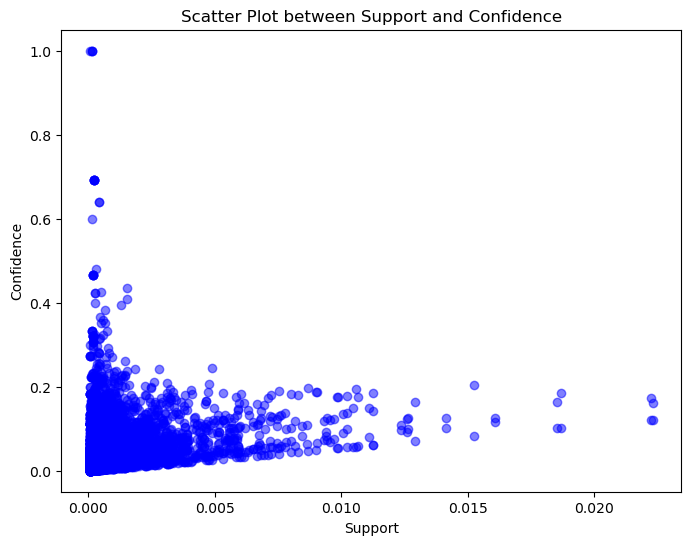

In [261]:
#support vs Confidence?
plt.figure(figsize=(8, 6))
plt.scatter(final_result['Support'], final_result['Confidence'], alpha=0.5, color='blue')
plt.title('Scatter Plot between Support and Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

In [ ]:
zhang_sorted = final_result[final_result['zhang']>0].sort_values('zhang', ascending=False)
final_result

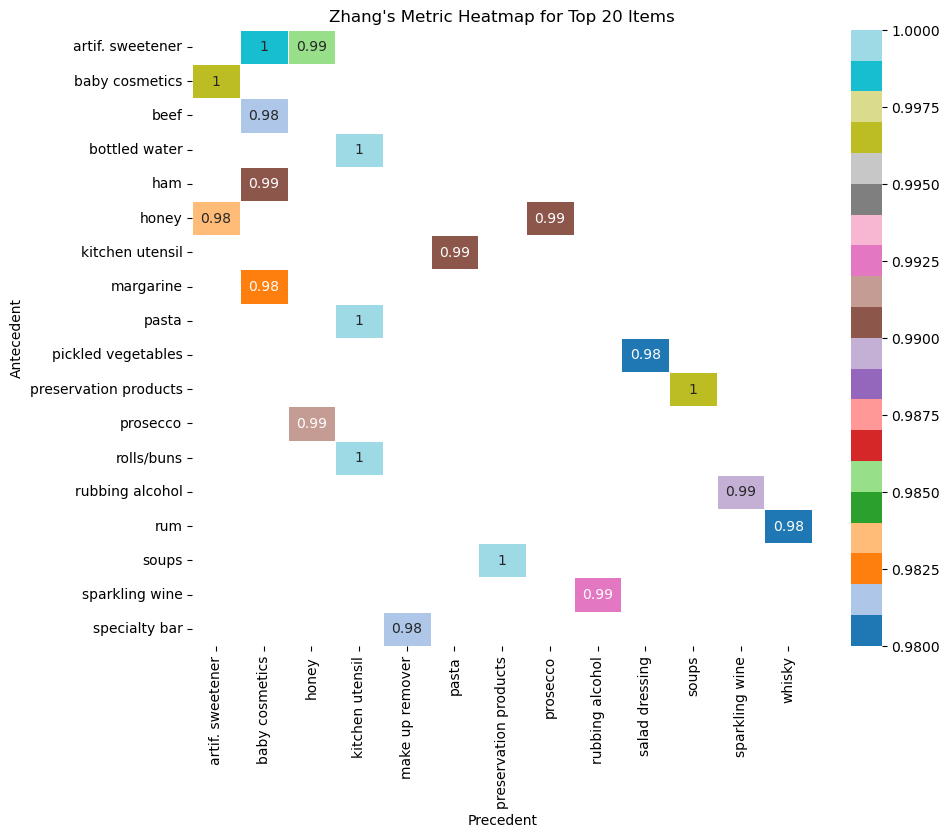

In [259]:
# Filter the top 20 items with Zhang's metric greater than 0
top_20_zhangs = final_result[final_result['Zhangs_metric'] > 0].nlargest(20, 'Zhangs_metric')

# Reshape the data for heatmap visualization
heatmap_data = top_20_zhangs.pivot(index='Antecedent', columns='Precedent', values='Zhangs_metric')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='tab20', linewidths=0.5)
plt.title("Zhang's Metric Heatmap for Top 20 Items")
plt.xlabel('Precedent')
plt.ylabel('Antecedent')
plt.show()

In [262]:
#visualizing the networks
import networkx as nx

In [266]:
top_10_zhangs = final_result[final_result['Zhangs_metric'] > 0].nlargest(10, 'Zhangs_metric')

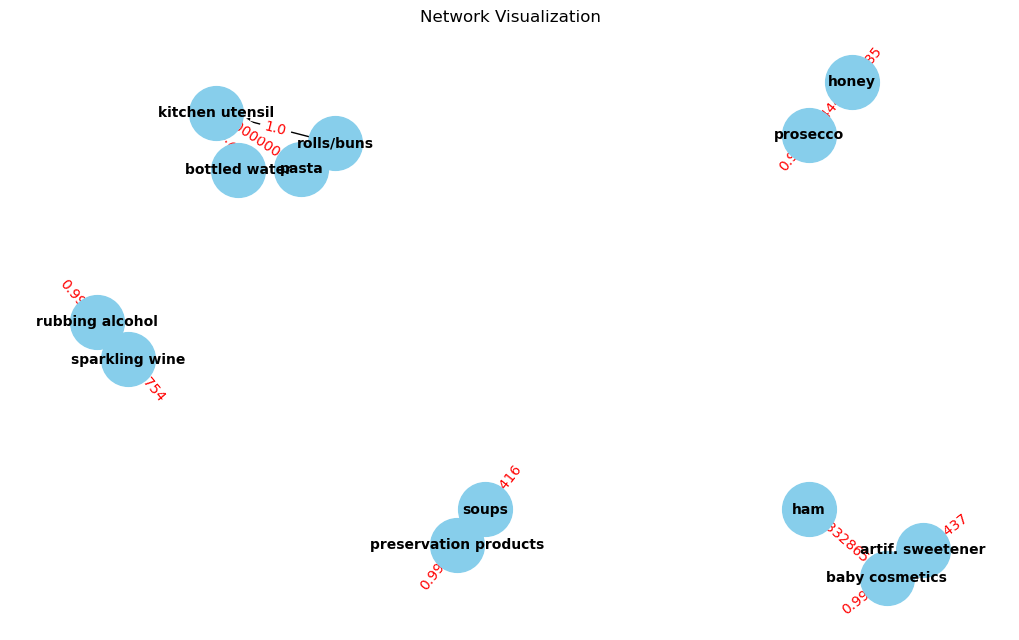

In [267]:
# Create a directed graph
G = nx.DiGraph()

# Add edges with attributes from the DataFrame
for index, row in top_10_zhangs.iterrows():
    G.add_edge(row['Antecedent'], row['Precedent'], Occurrence=row['Occurence'],
               Support=row['Support'], Lift=row['Lift'], Confidence=row['Confidence'],
               Leverage=row['Leverage'], Conviction=row['Conviction'], Zhangs_metric=row['Zhangs_metric'])

# Draw the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1500, node_color='skyblue', font_weight='bold', font_size=10, edge_color='black')
edge_labels = nx.get_edge_attributes(G, 'Zhangs_metric')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.title('Network Visualization')
plt.show()

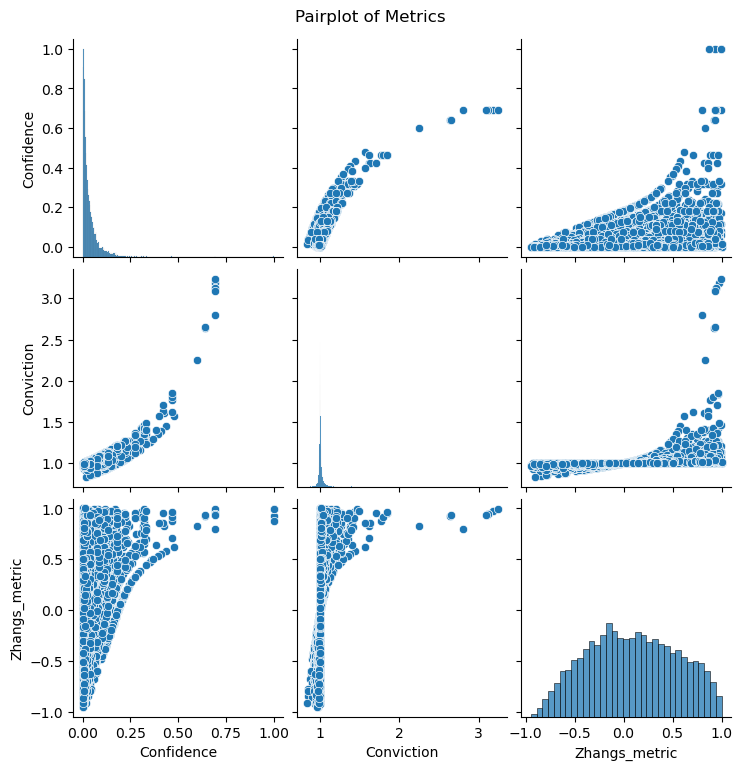

In [270]:
# Pairplot of Confidence, Conviction, and Zhang's Score
sns.pairplot(final_result[['Confidence', 'Conviction', 'Zhangs_metric']])
plt.suptitle('Pairplot of Metrics', y=1.02)
plt.show()

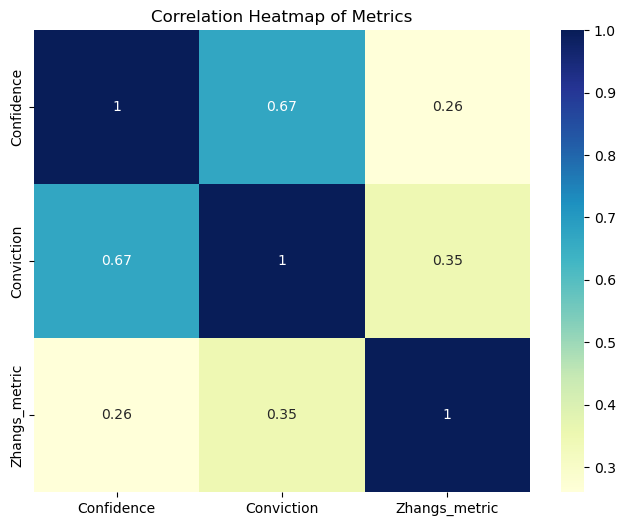

In [269]:
#correlation matrix
correlation_matrix = final_result[['Confidence', 'Conviction', 'Zhangs_metric']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap of Metrics')
plt.show()